In [48]:
# importing the necessary requirements
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LinearRegression
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
dataframe = pd.read_csv("Admission_Prediction.csv")
dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [50]:
dataframe.shape

(500, 9)

In [51]:
dataframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


from the count i can see that i have missing values, thus i will need to impute them

it is clear from the "std column" i have diffrent scales so i will need to use a StandardScaler

In [52]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [53]:
dataframe.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [54]:
# imputing the missing values in the dataframe
GRE_Score = dataframe['GRE Score'].fillna(dataframe['GRE Score'].mode()[0])
TOEFL_Score = dataframe['TOEFL Score'].fillna(dataframe['TOEFL Score'].mode()[0])
University_Rating = dataframe['University Rating'].fillna(dataframe['University Rating'].mode()[0])

In [55]:
dataframe['GRE Score'] = GRE_Score
dataframe['TOEFL Score'] = TOEFL_Score
dataframe['University Rating'] = University_Rating

In [56]:
dataframe.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [57]:
# removing columns which are not need since they wont show any relations with the target
dataframe = dataframe.drop(['Serial No.'], axis=1)
dataframe

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [58]:
# i also need to remove the target column from my dataset
X = dataframe.drop('Chance of Admit', axis=1)
y = dataframe['Chance of Admit']

In [59]:
# since my dataset have a varying scale i need to scale it to have a uniform scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.85052822,  1.77547686,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [60]:
feature_columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research']

In [61]:
X = pd.DataFrame(X_scaled, columns=feature_columns )
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.850528,1.775477,0.782010,1.137360,1.098944,1.776806,0.886405
1,0.681471,-0.040277,0.782010,0.632315,1.098944,0.485859,0.886405
2,-0.397659,-0.535482,-0.104623,-0.377773,0.017306,-0.954043,0.886405
3,0.501616,0.454929,-0.104623,0.127271,-1.064332,0.154847,0.886405
4,-0.217804,-0.700551,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.400891,0.124792,1.668642,1.137360,0.558125,0.734118,0.886405
496,1.850528,1.610408,1.668642,1.642404,1.639763,2.140919,0.886405
497,1.221036,2.105614,1.668642,1.137360,1.639763,1.627851,0.886405
498,-0.397659,-0.700551,0.782010,0.632315,1.639763,-0.242367,-1.128152


In [62]:
X.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.290834e-15,9.303669e-17,1.398881e-16,2.926548e-16,-1.332268e-17,3.091971e-15,-2.202682e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.376065e+00,-2.516304e+00,-1.877887e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.674420e-01,-7.005507e-01,-9.912547e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,-3.794941e-02,-4.027672e-02,-1.046226e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.814706e-01,7.850658e-01,7.820095e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.120311e+00,2.105614e+00,1.668642e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


In [63]:
df_scaled = pd.concat([X, y], axis=1)
df_scaled

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.850528,1.775477,0.782010,1.137360,1.098944,1.776806,0.886405,0.92
1,0.681471,-0.040277,0.782010,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.397659,-0.535482,-0.104623,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.501616,0.454929,-0.104623,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.217804,-0.700551,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152,0.65
...,...,...,...,...,...,...,...,...
495,1.400891,0.124792,1.668642,1.137360,0.558125,0.734118,0.886405,0.87
496,1.850528,1.610408,1.668642,1.642404,1.639763,2.140919,0.886405,0.96
497,1.221036,2.105614,1.668642,1.137360,1.639763,1.627851,0.886405,0.93
498,-0.397659,-0.700551,0.782010,0.632315,1.639763,-0.242367,-1.128152,0.73


In [64]:
df_scaled['Chance_of_Admit'] =df_scaled['Chance of Admit'] 

In [65]:
df_scaled = df_scaled.drop('Chance of Admit', axis=1)
df_scaled

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.850528,1.775477,0.782010,1.137360,1.098944,1.776806,0.886405,0.92
1,0.681471,-0.040277,0.782010,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.397659,-0.535482,-0.104623,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.501616,0.454929,-0.104623,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.217804,-0.700551,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152,0.65
...,...,...,...,...,...,...,...,...
495,1.400891,0.124792,1.668642,1.137360,0.558125,0.734118,0.886405,0.87
496,1.850528,1.610408,1.668642,1.642404,1.639763,2.140919,0.886405,0.96
497,1.221036,2.105614,1.668642,1.137360,1.639763,1.627851,0.886405,0.93
498,-0.397659,-0.700551,0.782010,0.632315,1.639763,-0.242367,-1.128152,0.73


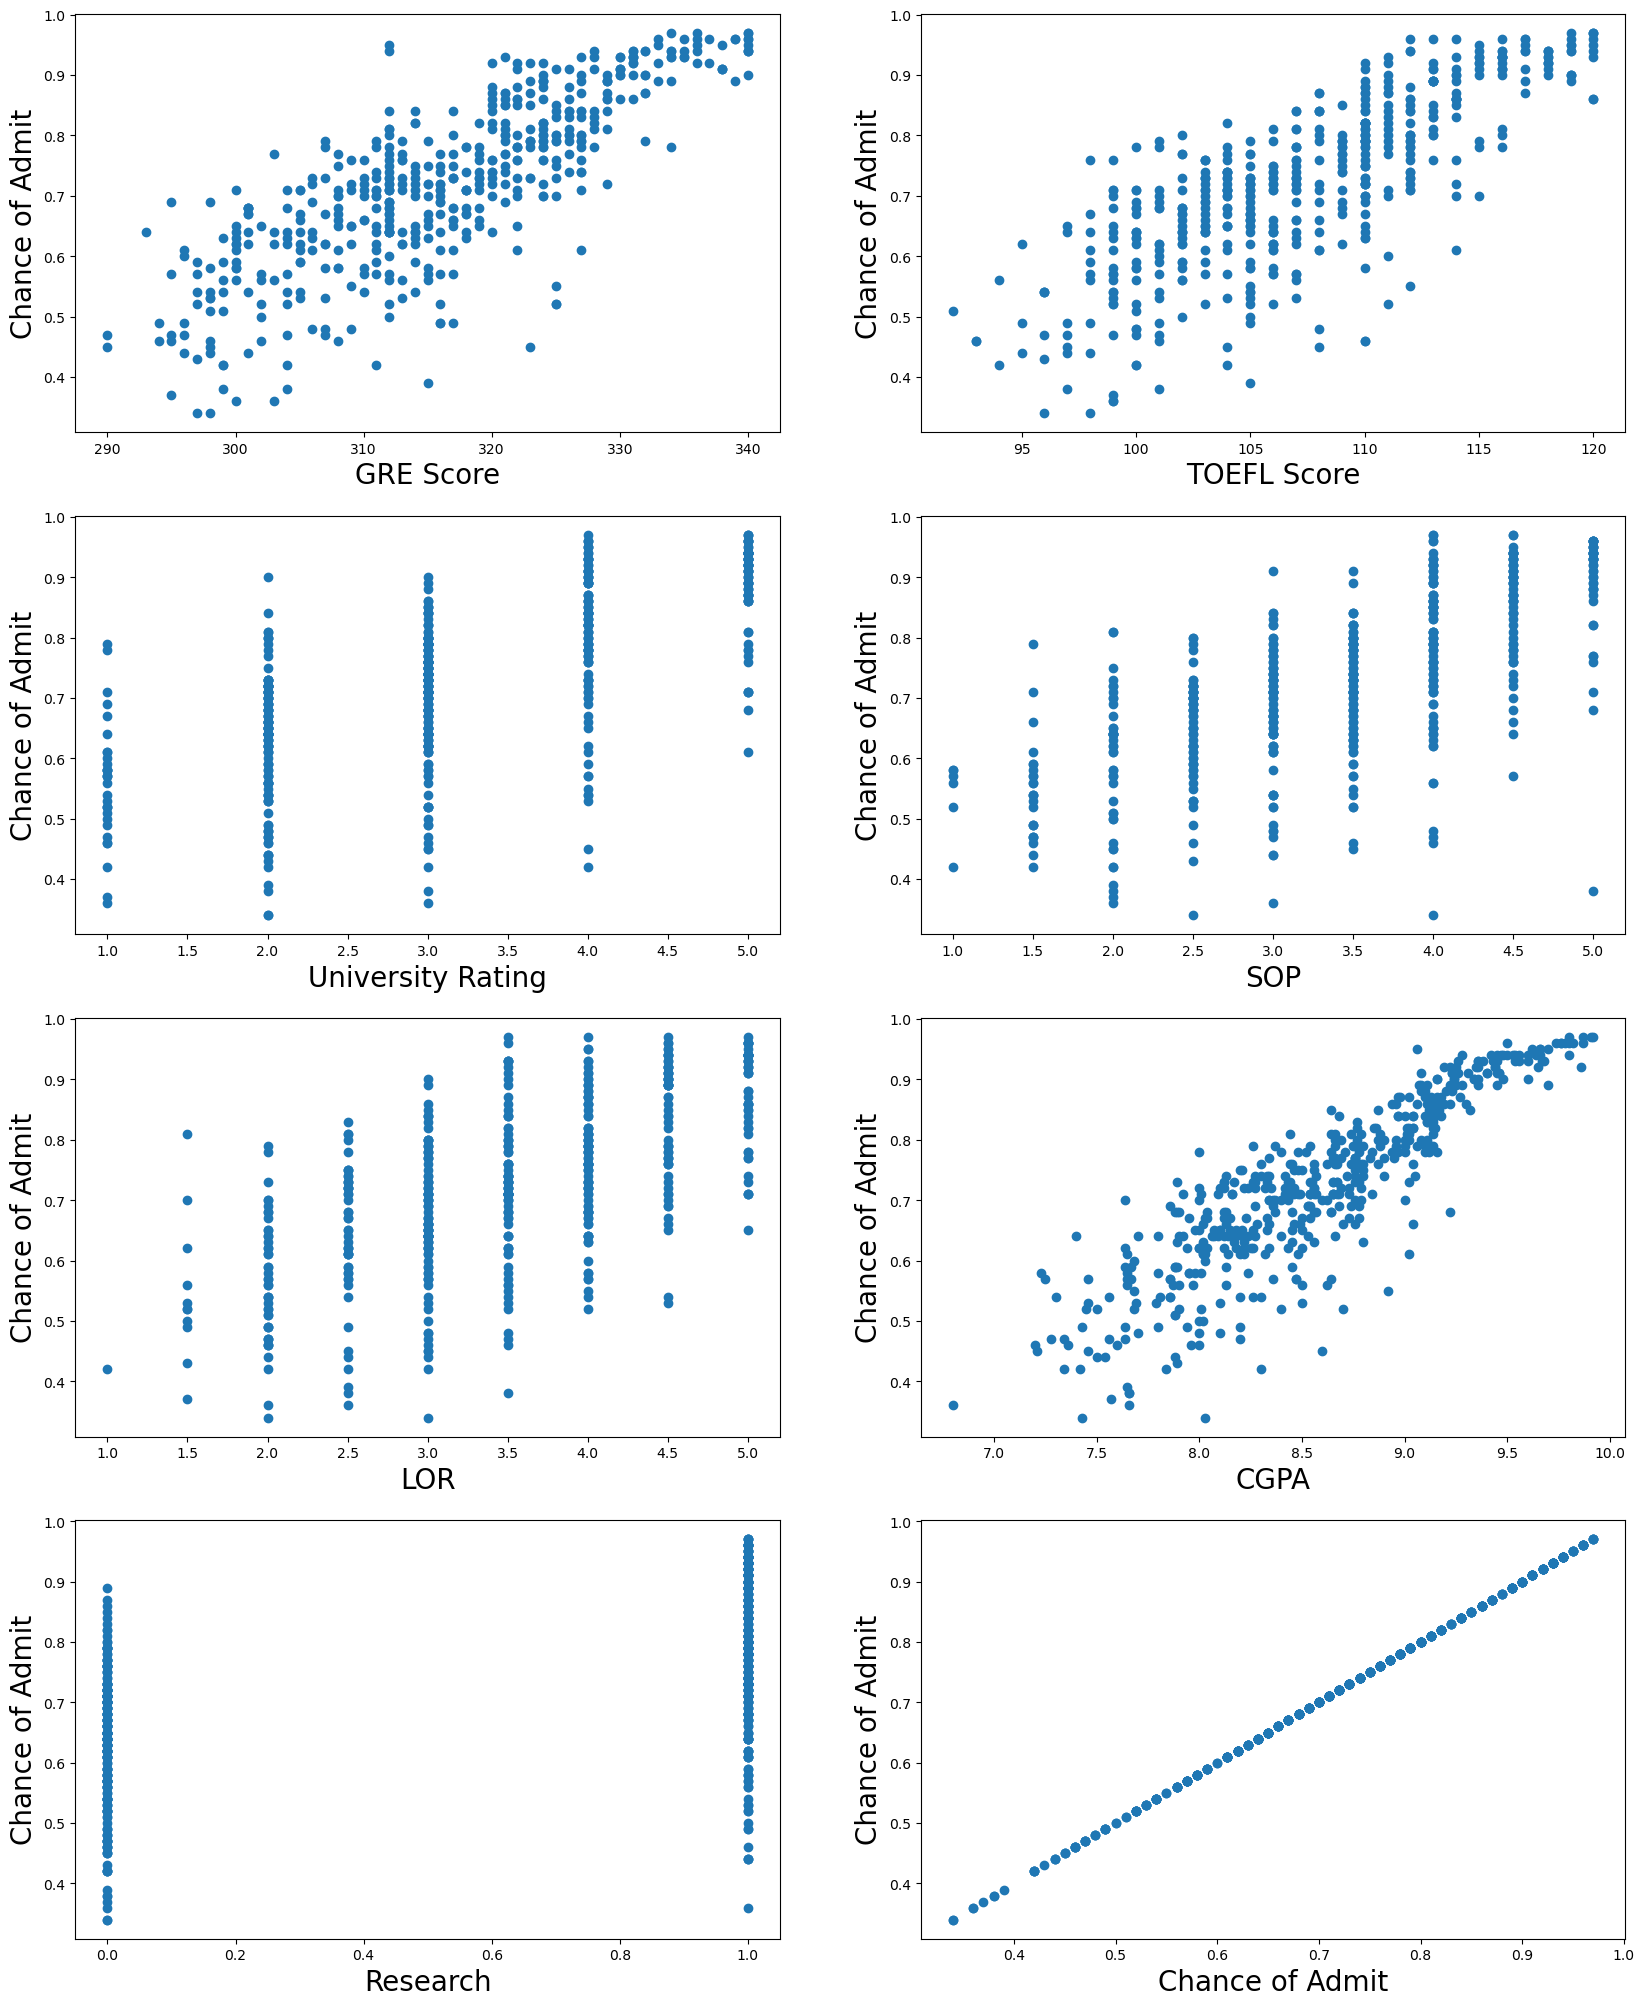

In [66]:
plt.figure(figsize = (20, 25), facecolor='white')
plotnumber = 1

for column in dataframe:
    if plotnumber <= len(dataframe.columns):
        ax = plt.subplot(4,2, plotnumber)
        plt.scatter(dataframe[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Chance of Admit", fontsize=20)
    plotnumber+=1
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

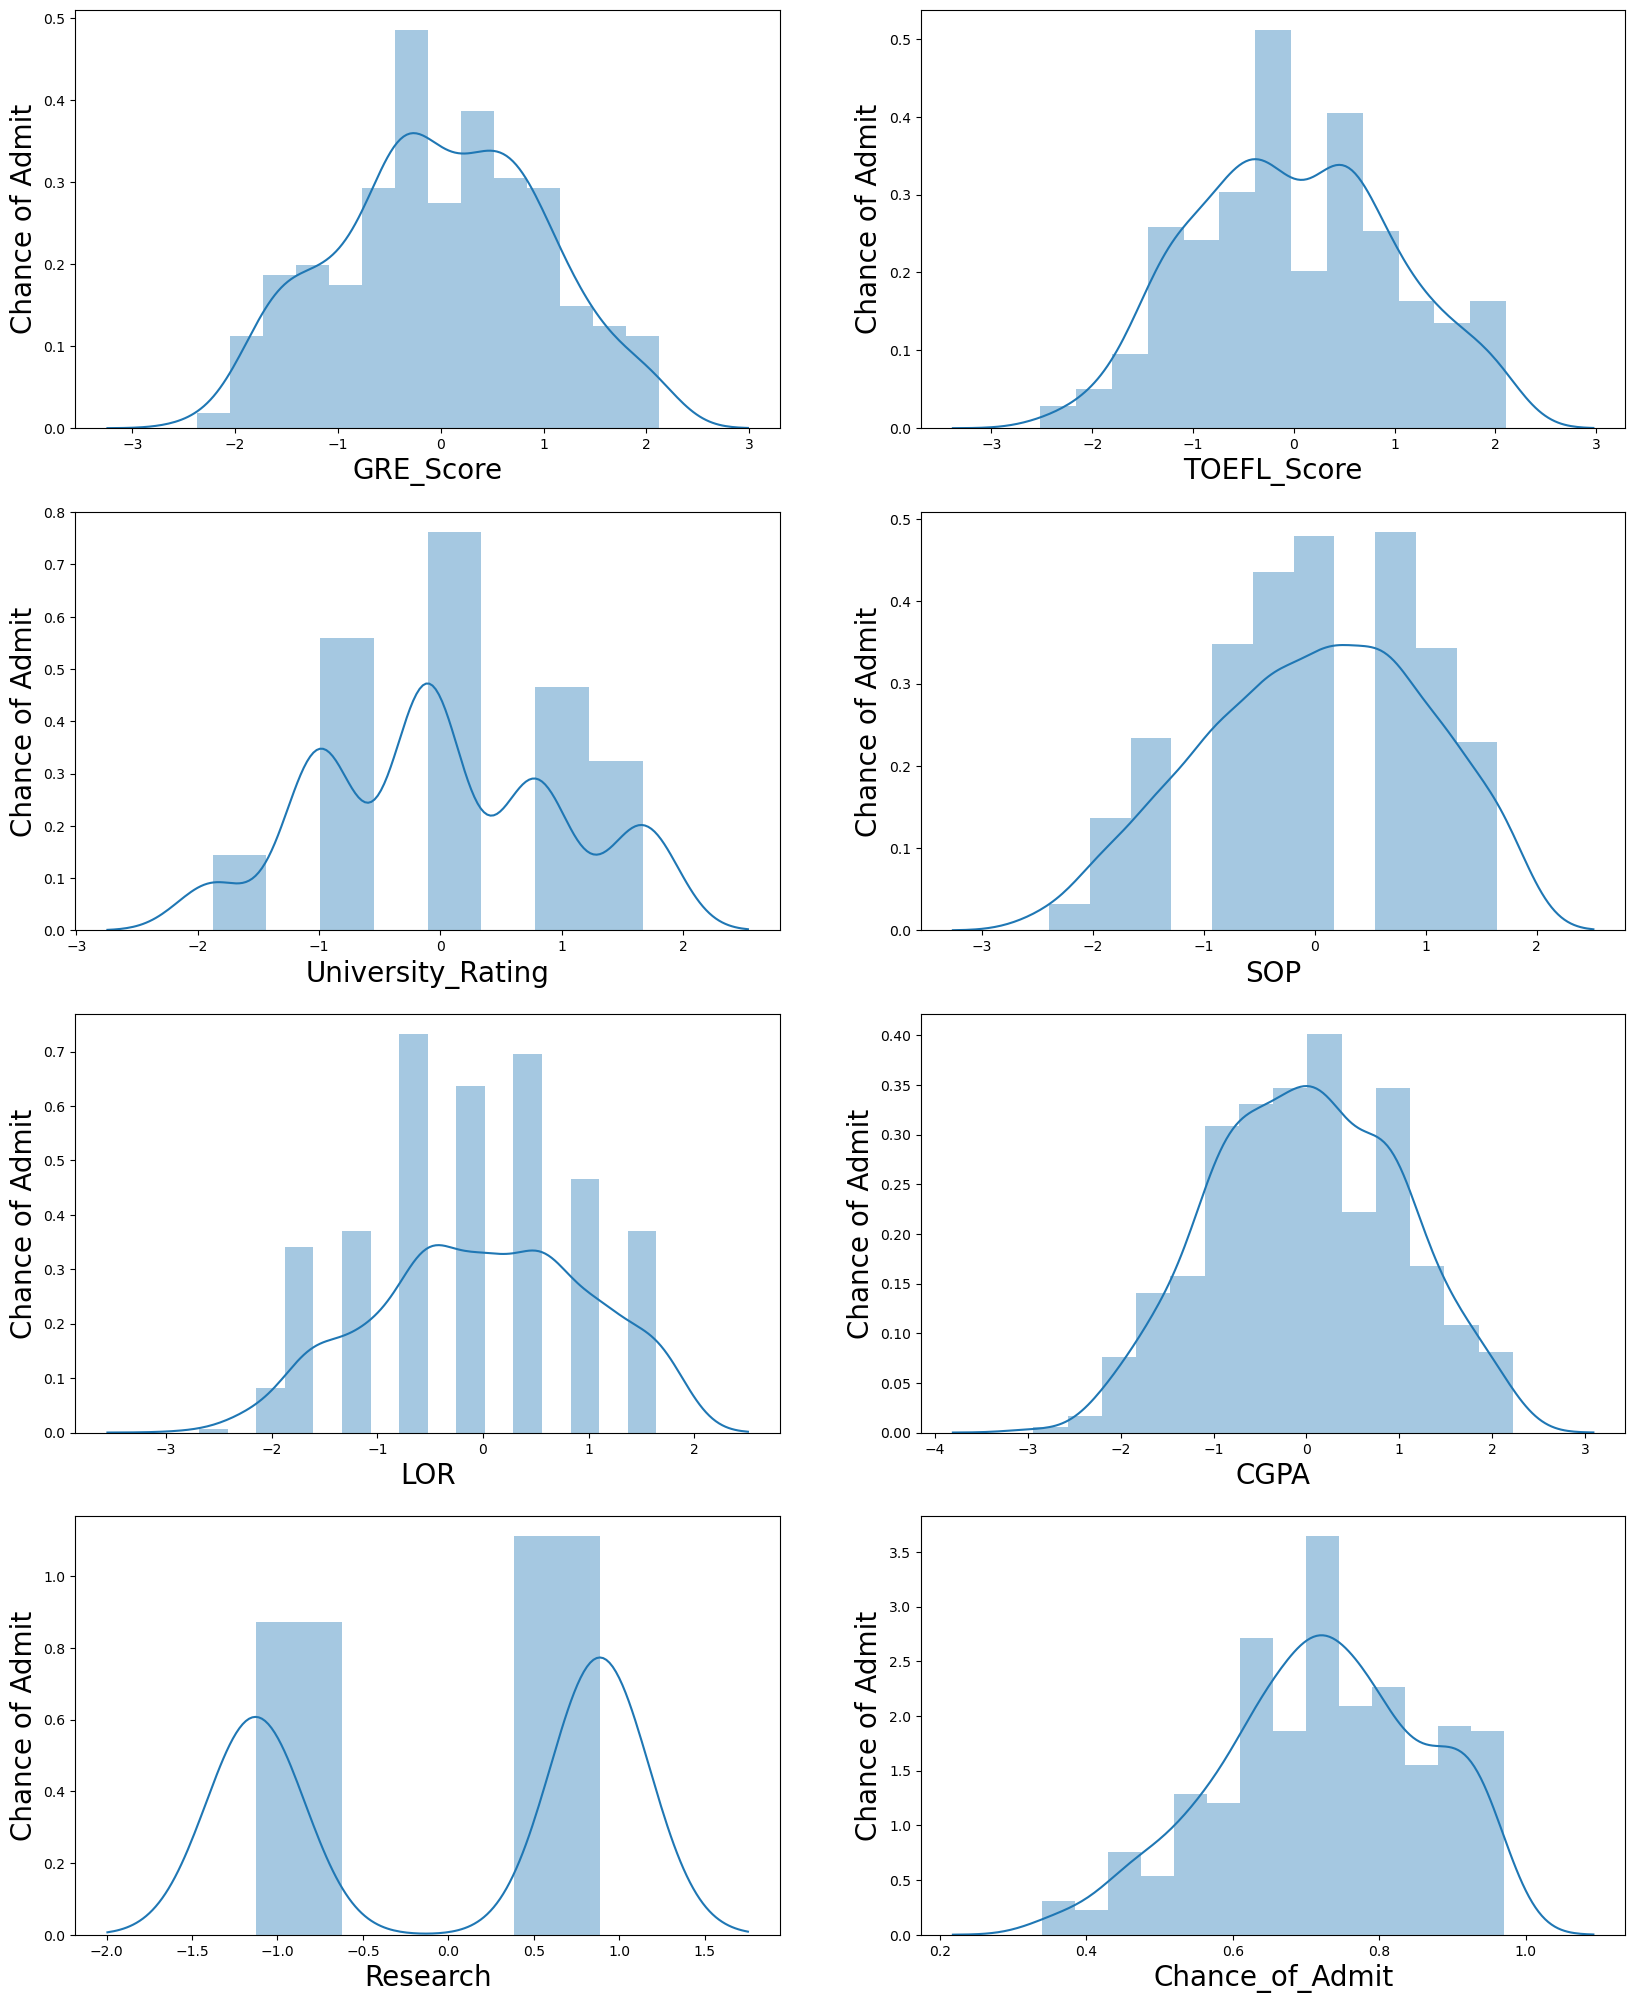

In [67]:
# visualizing the dataset
plt.figure(figsize = (20, 25), facecolor='white')
plotnumber = 1

for column in df_scaled:
    if plotnumber <= len(df_scaled.columns):
        ax = plt.subplot(4,2, plotnumber)
        sns.distplot(df_scaled[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Chance of Admit", fontsize=20)
    plotnumber+=1
plt.show()

In [68]:
# splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state= 355)

In [69]:
# feeding my dataset into my linear_regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [70]:
# print the intercept and the coeeficient
print(linear_model.intercept_)
print(linear_model.coef_)

0.7232470874662371
[0.02358575 0.01020724 0.00482534 0.00348236 0.01476224 0.07735863
 0.00940063]


i dont have a coefficient of any feature which is giving me a negative

In [71]:
# testing the accuarcy of my linear regression model
print(linear_model.score(x_train, y_train))
print(linear_model.score(x_test, y_test))

0.8412982279325515
0.7726522110064094


seems like my model has overfitted on the training dataset

## performing the statistics on my model
i want to get an idea about how my model is performing, based on my feature labels and the target


In [72]:
df_scaled.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [73]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research', data=df_scaled).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     322.2
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          3.10e-179
Time:                        15:02:45   Log-Likelihood:                 700.03
No. Observations:                 500   AIC:                            -1384.
Df Residuals:                     492   BIC:                            -1350.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7217      0.003    268.312      0.000       0.716       0.727
GRE_Score             0.0193      0.005      3.564      0.000       0.009       0.030
TOEFL_Score           0.0172      0.005      3.320      0.001       0.007       0.027
University_Rating     0.0057      0.004      1.347      0.179      -0.003       0.014
SOP                   0.0020      0.004      0.444      0.657      -0.007       0.011
LOR                   0.0155      0.004      4.029      0.000       0.008       0.023
CGPA                  0.0732      0.006     12.625      0.000       0.062       0.085
Research              0.0127      0.003      3.918      0.000       0.006       0.019
==============================================================================
Omnibus:                      110.071   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.937
Skew:                          -1.146   Prob(JB):                     1.45e-54
Kurtosis:                       5.578   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

my kurtosis is greater than 3 meaning that my dataset is extreme to outliers

since i have more than one feature column i should look for adjusted r^2

my "university_level" column  and "SOP" is trying show me that there is a negative probability

<AxesSubplot:>

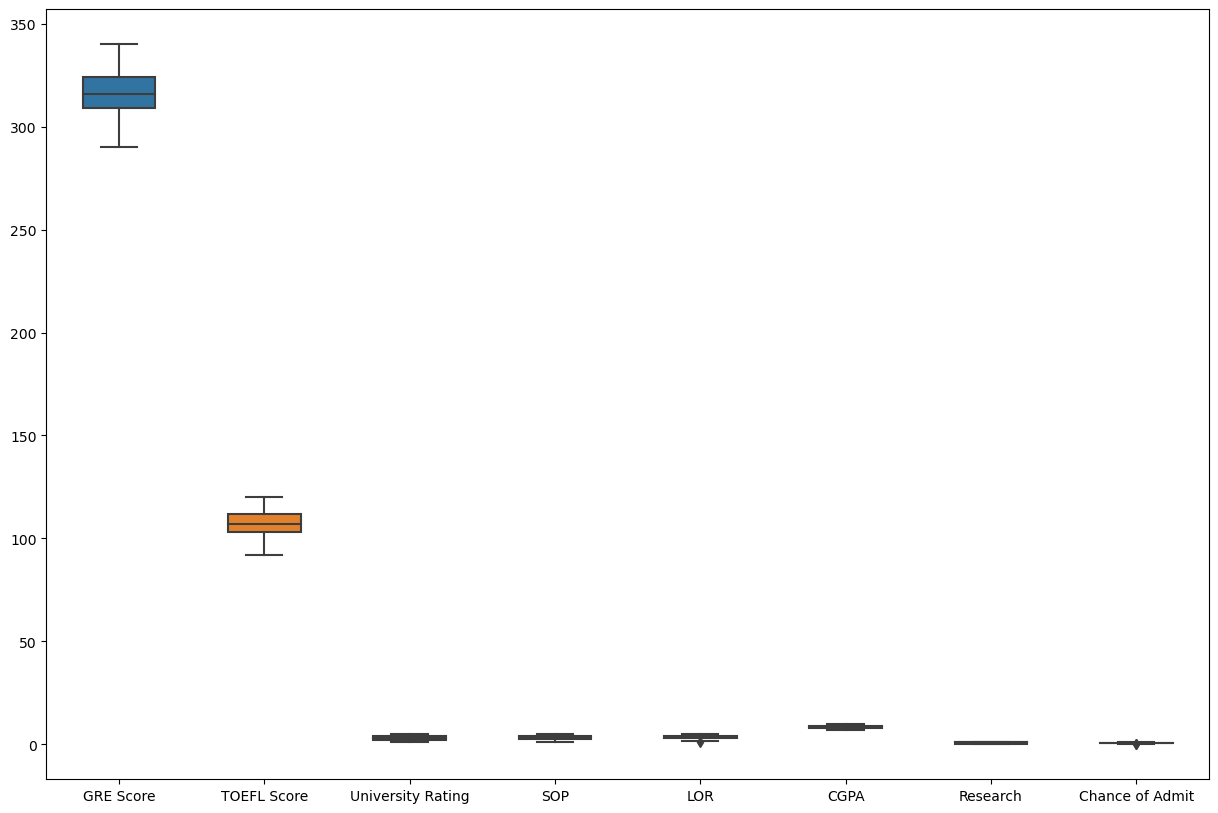

In [74]:
# drawing a box plot to see how extreme my outliers are:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = dataframe, width=0.5, ax=ax, fliersize=5)

## checking for multicollinearity in my dataset


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# creating an empty dataframe
vif = pd.DataFrame()

# using variance inflation factor to output respective VIFs
vif["vif"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# feature names to make it easy to explore the variables
vif['Columns'] = X.columns

vif

,vif,Columns
0,4.049191,GRE_Score
1,3.707032,TOEFL_Score
2,2.516748,University_Rating
3,2.776452,SOP
4,2.038678,LOR
5,4.642308,CGPA
6,1.462087,Research


my vif is below 5, therefore the multicollinearity is not so much severe in my dataset

In [76]:
#linear_model.score(x_test, y_test)
linear_model.fit(x_train, y_train)
print("The accuracy of training is:", linear_model.score(x_train, y_train))
print("The accuracy of testing is:", linear_model.score(x_test, y_test))

The accuracy of training is: 0.8412982279325515
The accuracy of testing is: 0.7726522110064094


In [95]:
from sklearn.metrics import r2_score, accuracy_score
y_pred = linear_model.predict(x_test)
r2_score(linear_model.predict(x_test), y_test)

0.7035095830444098

In [78]:
# the variation of training and the test data makes the model to seem like it has overfitted
# using regulaziation to penalize my model if it is overfitting


In [79]:
lassCV = LassoCV(alphas=None, cv=10, max_iter=10000, verbose=3, n_jobs=-1)
lassCV.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00314208, 0.        ]), -8.881784197001252e-16, 0.0006151751111111111, 2)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01136681, 0.        ]), 0.0, 0.0006151751111111111, 2)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01903722, 0.        ]), 0.0, 0.0006151751111111111, 3)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02619067, 0.        ]), 0.0, 0.0006151751111111111, 3)
(array([0.      , 0.      , 0.      , 0.      , 0.      , 0.032862,
       0.      ]), 4.440892098500626e-16, 0.0006151751111111111, 3)
(array([0., 0., 0., 0., 0., 0., 0.]), 0.0, 0.0006077473015873016, 1)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00161356, 0.        ]), -8.881784197001252e-16, 0.0006237788571428572, 2)
(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00764289, 0.        

(array([0.02092616, 0.01009522, 0.00380817, 0.00233926, 0.01609138,
       0.07976211, 0.00761872]), 9.069926588556321e-05, 0.0006077473015873016, 5)(array([0.02041176, 0.00957688, 0.0022666 , 0.00107741, 0.01410779,
       0.08551306, 0.00910635]), 8.036858128468438e-05, 0.0006453433015873016, 4)
(array([0.02413422, 0.01046311, 0.00274526, 0.00294512, 0.01576361,
       0.07753692, 0.00932153]), 7.920482559597986e-05, 0.0006237788571428572, 5)

(array([0.02413725, 0.01048648, 0.00276456, 0.00295237, 0.01579291,
       0.07752569, 0.00935812]), 7.394963664086873e-05, 0.0006237788571428572, 5)
(array([0.02041755, 0.00959086, 0.00227997, 0.00108583, 0.01413359,
       0.08550033, 0.00913746]), 7.495342992491771e-05, 0.0006453433015873016, 4)
(array([0.02042295, 0.00960391, 0.00229244, 0.0010937 , 0.01415764,
       0.08548845, 0.00916646]), 6.99495588589727e-05, 0.0006453433015873016, 4)
(array([0.02414008, 0.01050828, 0.00278256, 0.00295914, 0.01582023,
       0.07751522, 0.00939225]), 

(array([0.02472312, 0.01196699, 0.00559897, 0.00579232, 0.01390438,
       0.07262181, 0.00778732]), 7.28040017115017e-05, 0.0005776385396825398, 4)(array([0.02432521, 0.00713409, 0.003474  , 0.00276671, 0.01318441,
       0.07709606, 0.0055959 ]), 4.476270634423685e-05, 0.0006342328253968254, 12)

(array([0.01980106, 0.00871057, 0.00371684, 0.00980509, 0.01030485,
       0.0791012 , 0.00882874]), 7.992350957120031e-05, 0.0005997351111111112, 7)
(array([0.02430478, 0.0073805 , 0.00360823, 0.00283233, 0.01341921,
       0.07697911, 0.00587671]), 6.969445911675365e-05, 0.0006342328253968254, 11)
(array([0.0224105 , 0.00847099, 0.00428485, 0.00157311, 0.01521077,
       0.07875154, 0.00746107]), 6.995733499826073e-05, 0.0006180768253968254, 9)
(array([0.02472478, 0.01197917, 0.00560677, 0.00579912, 0.01391878,
       0.0726185 , 0.00780674]), 6.79316571279287e-05, 0.0005776385396825398, 4)
(array([0.02428354, 0.007609  , 0.00373315, 0.00289115, 0.01363655,
       0.07687506, 0.00613951]),

(array([0.02652534, 0.00724381, 0.00728644, 0.        , 0.01101939,
       0.07756078, 0.00791046]), 8.858589789884075e-05, 0.0006121179682539682, 7)
(array([0.02599585, 0.01133044, 0.00523053, 0.00187619, 0.01449161,
       0.07360754, 0.00946312]), 6.0886400690352005e-05, 0.0005916737777777778, 3)
(array([0.02653034, 0.00730119, 0.00732512, 0.        , 0.01109954,
       0.07753822, 0.00799717]), 8.283508240314319e-05, 0.0006121179682539682, 7)
(array([0.02599543, 0.01133758, 0.00523394, 0.00187977, 0.01450005,
       0.07360481, 0.00947314]), 5.678775448814122e-05, 0.0005916737777777778, 3)
(array([0.02599503, 0.01134424, 0.00523712, 0.00188311, 0.01450792,
       0.07360227, 0.00948248]), 5.296732269166604e-05, 0.0005916737777777778, 3)
(array([0.02599467, 0.01135045, 0.00524008, 0.00188623, 0.01451527,
       0.0735999 , 0.00949119]), 4.940524513230571e-05, 0.0005916737777777778, 3)
(array([0.02653501, 0.00735469, 0.00736119, 0.        , 0.01117429,
       0.07751718, 0.00807804])

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


LassoCV(cv=10, max_iter=10000, n_jobs=-1, verbose=3)

In [80]:
# best_alpha parameter
alpha = lassCV.alpha_
alpha

0.00012604209101084644

In [81]:
lasso_reg = Lasso(alpha)

In [82]:
lasso_reg.fit(x_train, y_train)
print("The accuracy of training is:",lasso_reg.score(x_test, y_test))
print("The accuarcy of testing is:", lasso_reg.score(x_train, y_train))

The accuracy of training is: 0.7725564417808051
The accuarcy of testing is: 0.8412968080079002


In [83]:
# using ridge for regularization
alphas = np.random.uniform(low=0.0, high=10.0, size=(50,))
ridgeCV = RidgeCV(alphas=alphas, cv=10)
ridgeCV.fit(x_train, y_train)

RidgeCV(alphas=array([9.17657806, 2.88813755, 1.20443691, 7.22698507, 4.20677745,
       4.63747154, 1.37689678, 4.66268526, 4.04498668, 8.35085509,
       0.96023556, 9.51893433, 9.27120206, 6.20577766, 1.34429427,
       6.88618343, 4.88952079, 3.95228039, 2.63070364, 1.8206672 ,
       5.92464252, 1.55275546, 6.13123624, 0.66574761, 6.51927084,
       9.15333848, 9.85360163, 4.82195172, 5.99028333, 0.33111852,
       1.15841649, 1.31057878, 6.01001343, 2.85506393, 4.34775149,
       8.80025584, 7.82288667, 8.14387784, 1.31053826, 8.92689589,
       9.15854598, 0.51369047, 7.9685435 , 6.63472942, 5.73703587,
       4.19808148, 7.4140955 , 7.3243344 , 0.85737742, 3.20413756]),
        cv=10)

In [84]:
# the best alpha parameter
alpha = ridgeCV.alpha_
alpha

9.853601629988086

In [85]:
ridge_model = Ridge(alpha)
ridge_model.fit(x_train, y_train)

Ridge(alpha=9.853601629988086)

In [86]:
# checking the accuarcy of the ridge model
print("The accuracy on the training data is: ",ridge_model.score(x_train, y_train))
print("The accuracy on the test data is: ",ridge_model.score(x_test, y_test))

The accuracy on the training data is:  0.8406984164701902
The accuracy on the test data is:  0.7746730523378906


In [96]:
# Elastic net
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [97]:
elasticCV.alpha_

0.00025208418202169293

In [98]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.00025208418202169293)

In [99]:
elasticnet_reg.score(x_test, y_test)

0.7725698462256207

by using the three models i can conclude and say that the model has not overfitted on the training data

In [100]:
# saving the model to be used later to do the prediction
with open("college_admit_predict", "wb") as file:
    pickle.dump(linear_model, file)
    file.close()

In [101]:
# loading the model to make some prediction
with open('college_admit_predict', "rb") as file:
    loaded_model = pickle.load(file)
    file.close()
    

In [124]:
predict_1 = np.asarray(df_scaled.iloc[497][0:-1]) 
predict_1

array([1.22103568, 2.10561387, 1.66864169, 1.13735981, 1.63976333,
       1.62785086, 0.88640526])

In [125]:
# making some prediction
loaded_model.predict([predict_1])

array([0.94401876])

In [119]:
df_scaled

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.850528,1.775477,0.782010,1.137360,1.098944,1.776806,0.886405,0.92
1,0.681471,-0.040277,0.782010,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.397659,-0.535482,-0.104623,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.501616,0.454929,-0.104623,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.217804,-0.700551,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152,0.65
...,...,...,...,...,...,...,...,...
495,1.400891,0.124792,1.668642,1.137360,0.558125,0.734118,0.886405,0.87
496,1.850528,1.610408,1.668642,1.642404,1.639763,2.140919,0.886405,0.96
497,1.221036,2.105614,1.668642,1.137360,1.639763,1.627851,0.886405,0.93
498,-0.397659,-0.700551,0.782010,0.632315,1.639763,-0.242367,-1.128152,0.73
